<a href="https://colab.research.google.com/github/ShathaMelhem/AI/blob/main/Iris_EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Impotring Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Dataset

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("himanshunakrani/iris-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/iris-dataset


In [4]:
df = pd.read_csv('/kaggle/input/iris-dataset/iris.csv')


# Discovering Dataset

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [9]:
# Total number of missing values of each column

df_null=df.isnull().sum()
df_null[df_null>0]
 # no nulls


,0


In [10]:
# Total number of missing values
df_null_sum=df.isnull().sum().sum()
print("Total missing values:", df_null_sum)
#no missing values

Total missing values: 0


In [11]:
percent=df.isnull().mean()*100
print(percent[percent>0])

Series([], dtype: float64)


there are 3 duplicates that need to be cleared from dataset

In [101]:
duplicates=df.duplicated().sum()
print("Number of duplicates:", duplicates)

Number of duplicates: 3


150 rows and 5 columns

In [13]:
df.shape

(150, 5)

In [14]:
df.count()

,0
sepal_length,150
sepal_width,150
petal_length,150
petal_width,150
species,150


In [15]:
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


# Seperate Numerical and Categorical Data

In [16]:
cat_col=df.select_dtypes(include=['object'])
cat_col


,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [17]:
num_col=df.select_dtypes(include=['number'])
num_col

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# EDA

## Univariate analysis
to study each variable alone

histogram used to study the frequency distributions and the number of observations within each given numerical variable.

we have 4 num variables:
1.   sepal width,
2.   sepal length,
3.   petal width, and
4.   petal length.

my observations are:
1.    there may be are outliers in sepal width distribution and skewed little bit to the left .
2.    combo dist in sepal length and petal length 3-petal width and petal length hist are bimodel

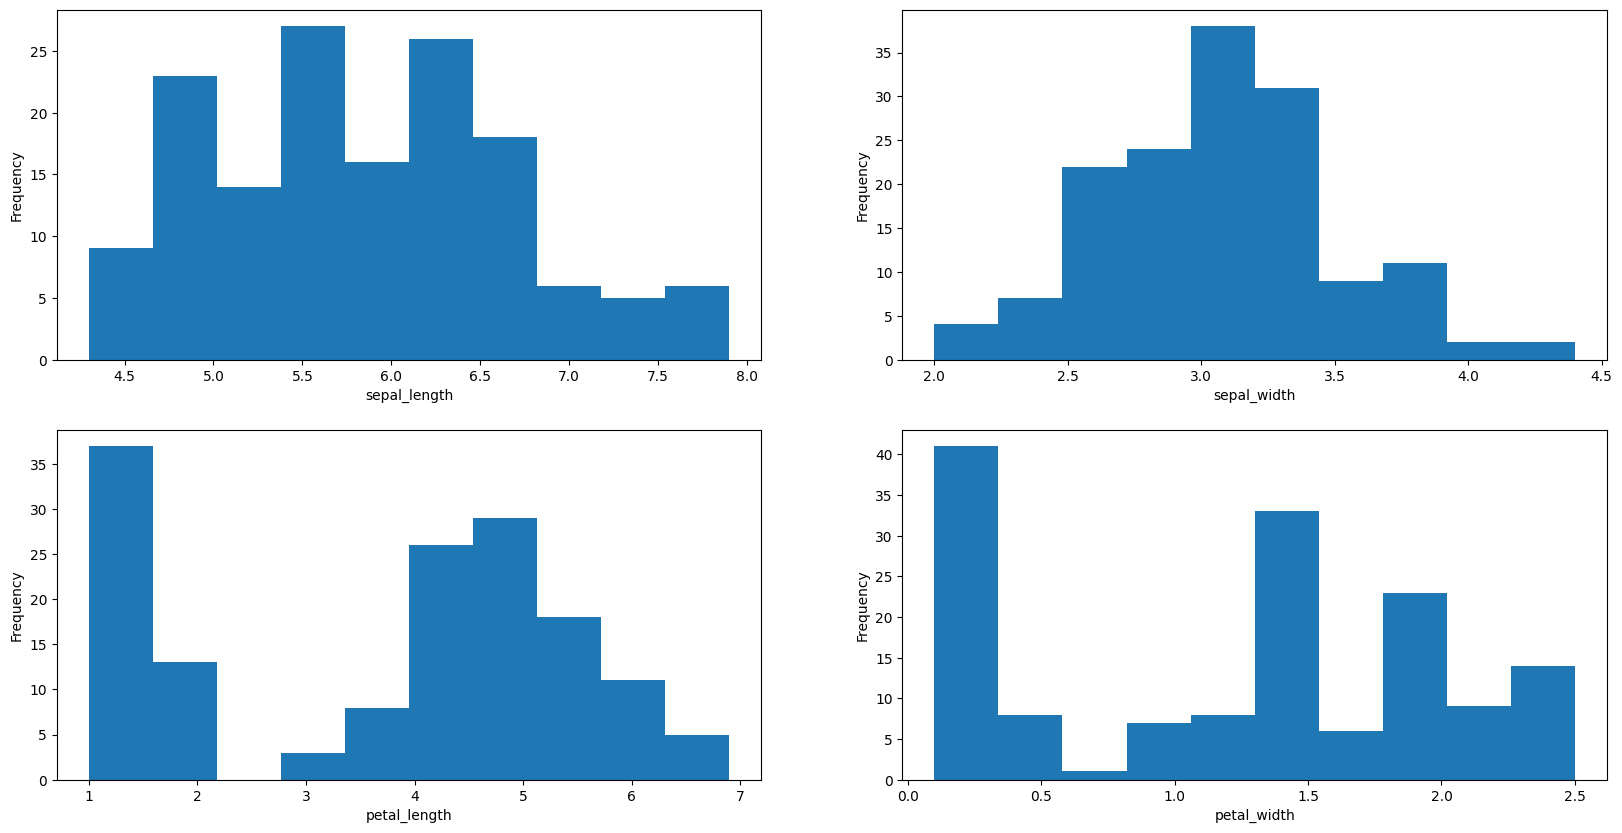

In [100]:
plt.figure(figsize= (20, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 2, i+ 1)
    plt.hist(x= df[col])

    plt.xlabel(f"{col}")
    plt.ylabel('Frequency')
plt.show()

here, we plot histograms using seaborn lib   

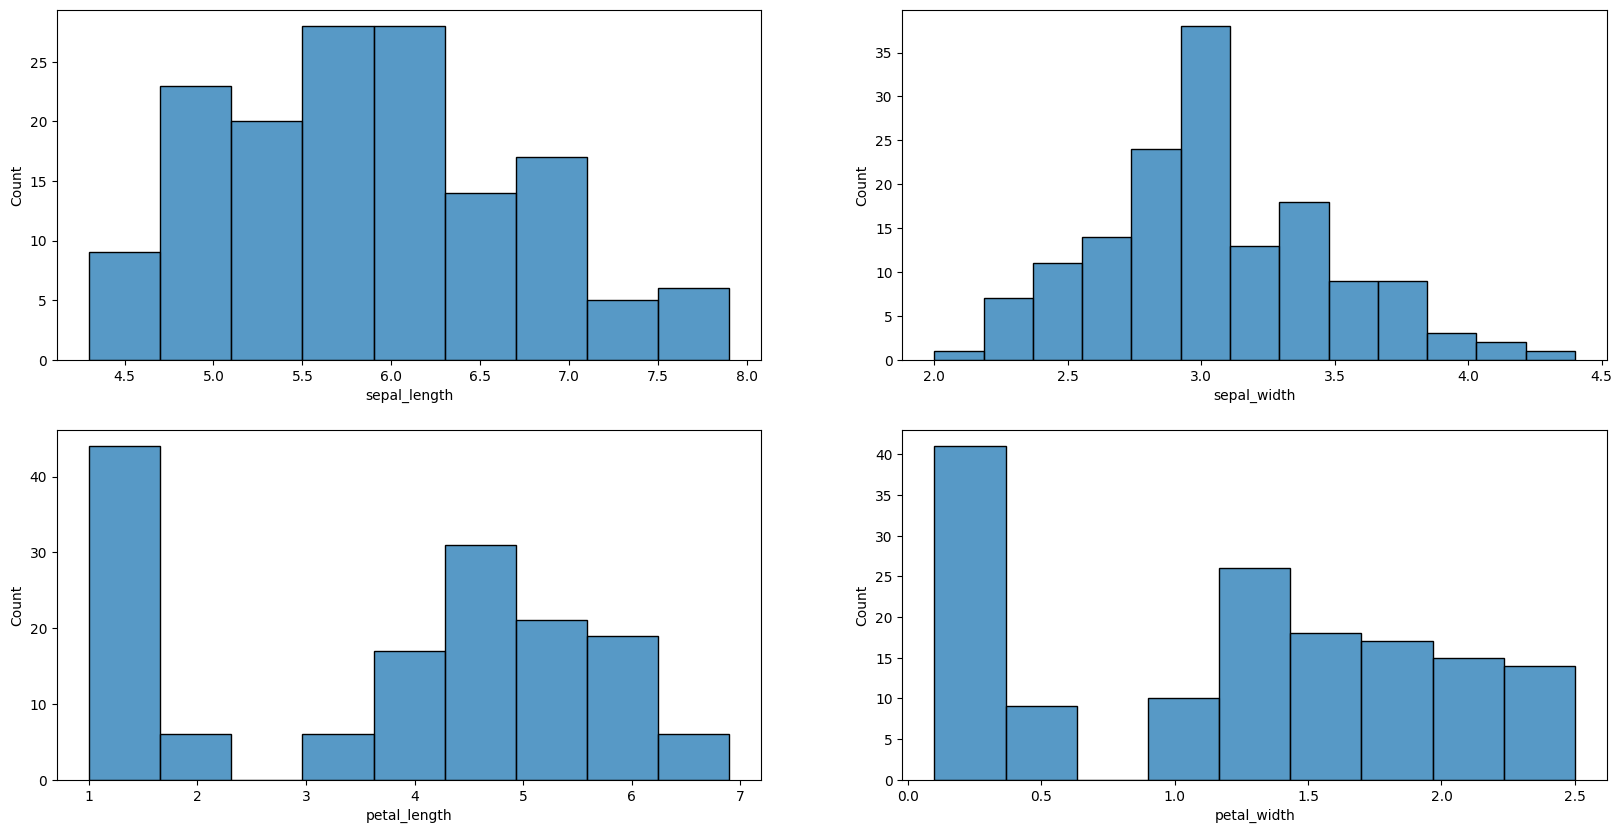

In [19]:
plt.figure(figsize= (20, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 2, i+ 1)
    sns.histplot(x= df[col])
plt.show()

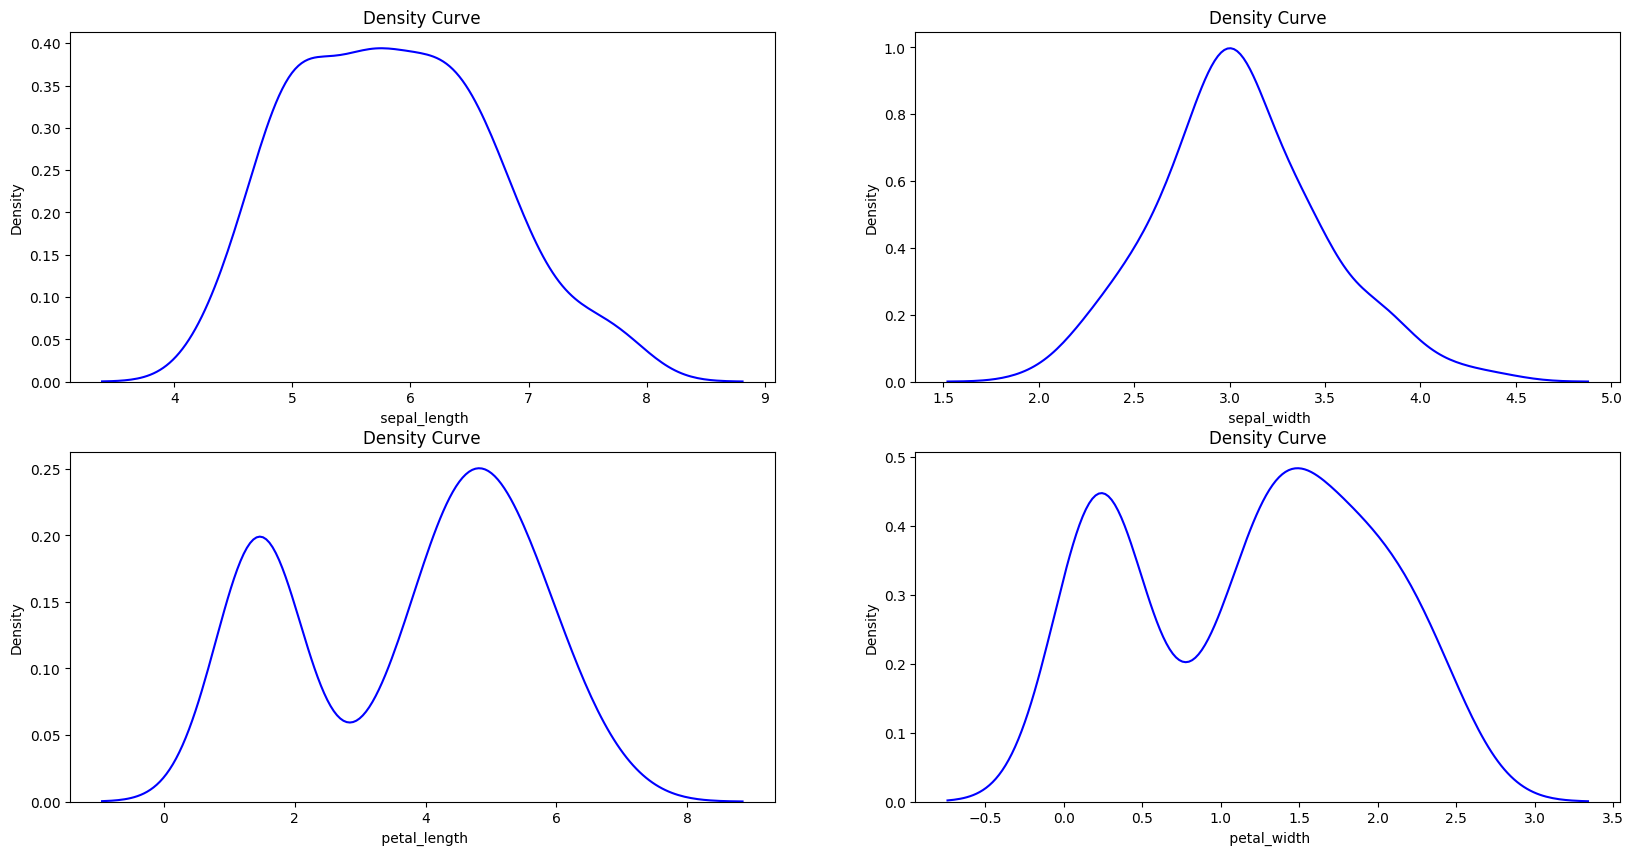

In [20]:
#Density curve (KDE):,numerical data ....continuous
plt.figure(figsize= (20, 10))

for i, col in enumerate(num_col):
    plt.subplot(2, 2, i+ 1)
    sns.kdeplot(df[col], color='blue')
    plt.title('Density Curve')
    plt.xlabel(f" {col}")
    plt.ylabel('Density')
plt.show()



box plot to study each num var each alone to discovre the outliers perfectly, hence the hist may not be clear enough to show them
***there are 4 outliers in sepal width ***

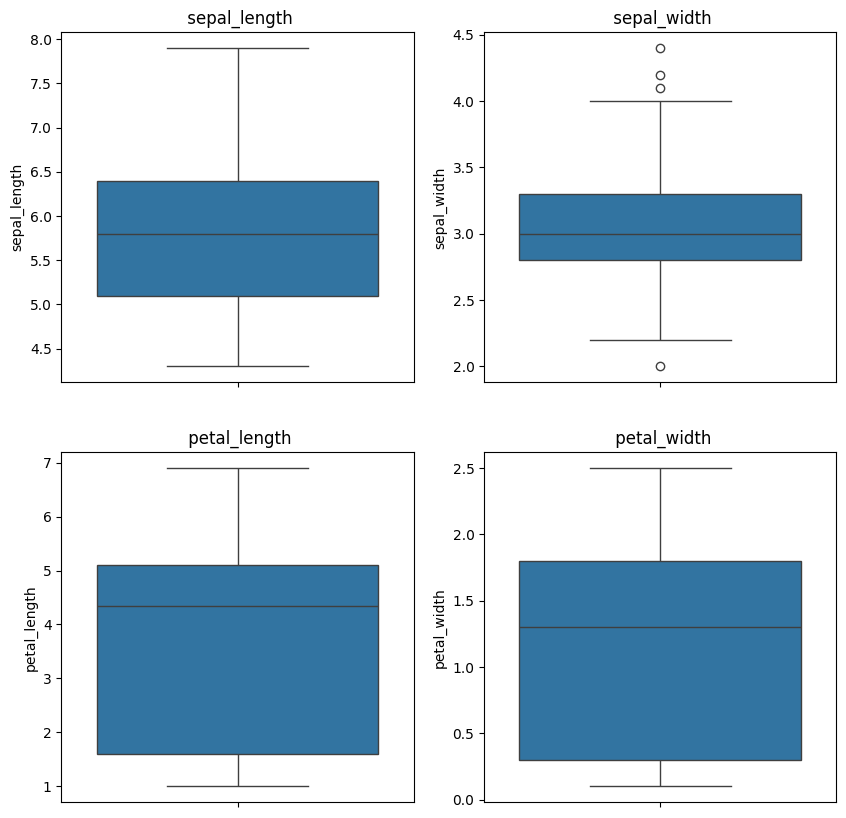

In [21]:
plt.figure(figsize= (10, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 2, i+ 1)
    sns.boxplot(data= df[col])
    plt.title(f" {col}")
plt.show()

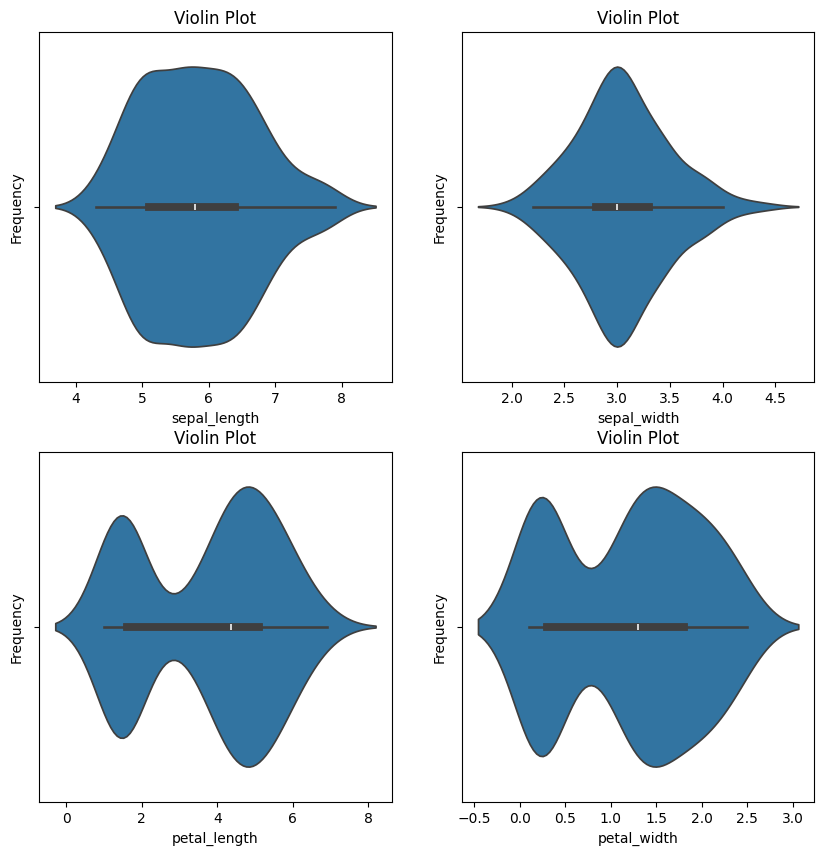

In [22]:
plt.figure(figsize= (10, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 2, i+ 1)
    sns.violinplot(x=df[col])
    plt.title('Violin Plot')
    plt.xlabel(f"{col}")
    plt.ylabel('Frequency')
plt.show()

since we have cat column which is the species column so its need to be study using bar plot to know the count of each category which is ***50*** for each


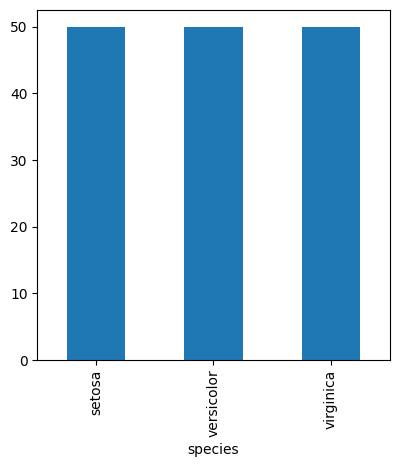

In [23]:
#bar plot :categorical data
plt.figure(figsize= (10, 10))
for i, col in enumerate(cat_col):
    plt.subplot(2, 2, i+ 1)
    df[col].value_counts().plot(kind='bar')

pie chart to define the percantage of each category
33.3% for each cat

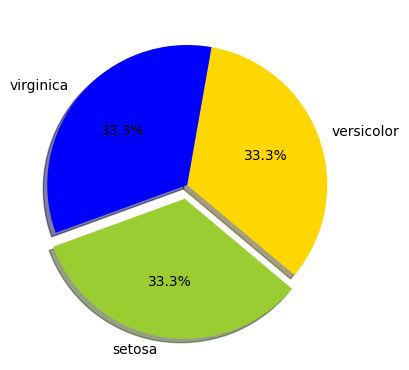

In [32]:
#pie chart :categorical data
plt.figure(figsize= (10, 10))
explode = (0.1, 0, 0) # Added one more value for the third slice
colors = ['yellowgreen', 'gold','blue']
for i, col in enumerate(cat_col):
    plt.subplot(2, 2, i+ 1)
    plt.pie(df[col].value_counts(),labels=df[col].value_counts().index, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=200)
plt.show()

## Bivariate Analysis
to study each two vars with each other

scatter for num vs num
first we convert num colms to list and then remove sepal_length col to study the relation between it and the rset of num colms
we can defined relationship between them as follows:


1.   sepal_length with sepal_width there is weak relationship.
2.   sepal_length with petal_length have strong positive relationship
3.   sepal_length with petal_width have strong positive relationship than others(can fit positive line )*


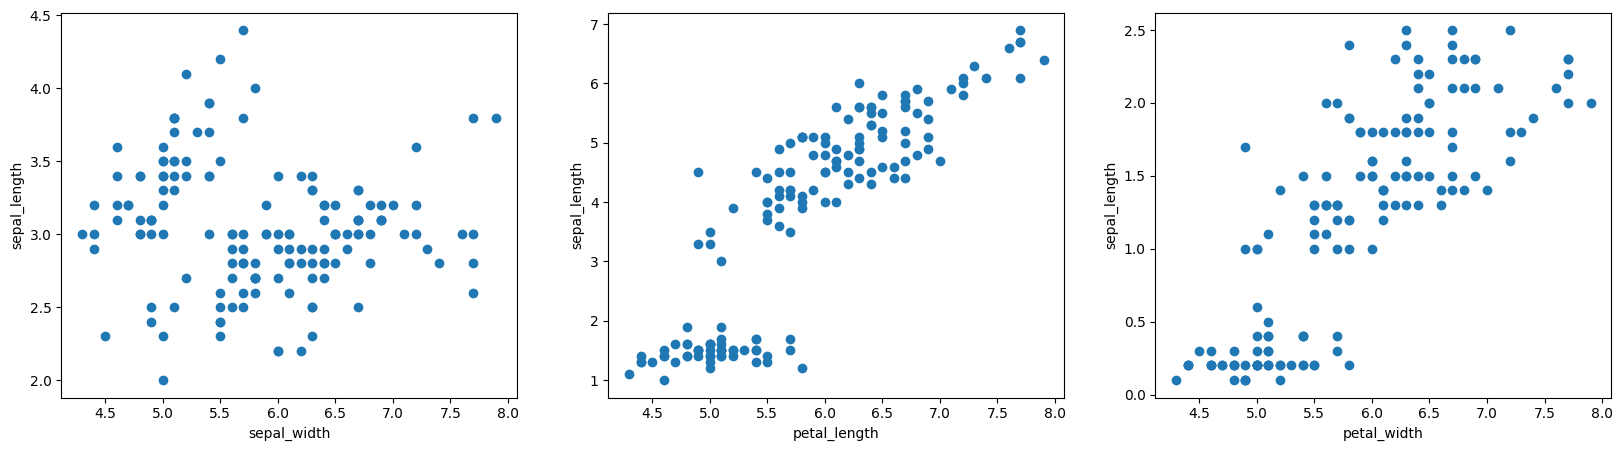

In [76]:
#scatter plot:num vs num
columns = list(num_col)
columns.remove('sepal_length')


fig, ax = plt.subplots(1, len(columns), figsize = (20, 5))

for idx, col in enumerate(columns, 0):
    ax[idx].plot(df['sepal_length'], df[col], 'o')
    ax[idx].set_xlabel(col)
    ax[idx].set_ylabel('sepal_length')

plt.show()



we can defined relationship between them as follows:


1.   sepal_width with sepal_length there is **almost no "very weak negative ** relationship.
2.   sepal_width with petal_length os also **weak negative** relationship
3.   sepal_width with petal_width also **weak negative** realtionship *

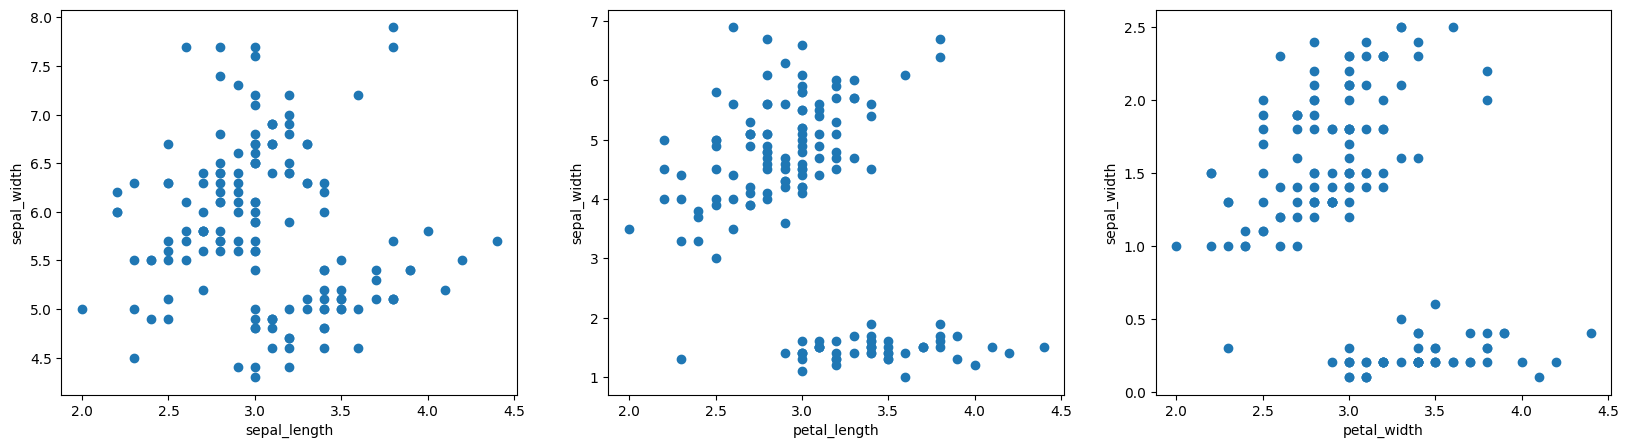

In [82]:
#scatter plot:num vs num
columns = list(num_col)

columns.remove('sepal_width')



fig, ax = plt.subplots(1, len(columns), figsize = (20, 5))

for idx, col in enumerate(columns, 0):
    ax[idx].plot(df['sepal_width'], df[col], 'o')
    ax[idx].set_xlabel(col)
    ax[idx].set_ylabel('sepal_width')

plt.show()

**all  histograms have strong positive relationship, except petal_length with sepal_width is negative weak **

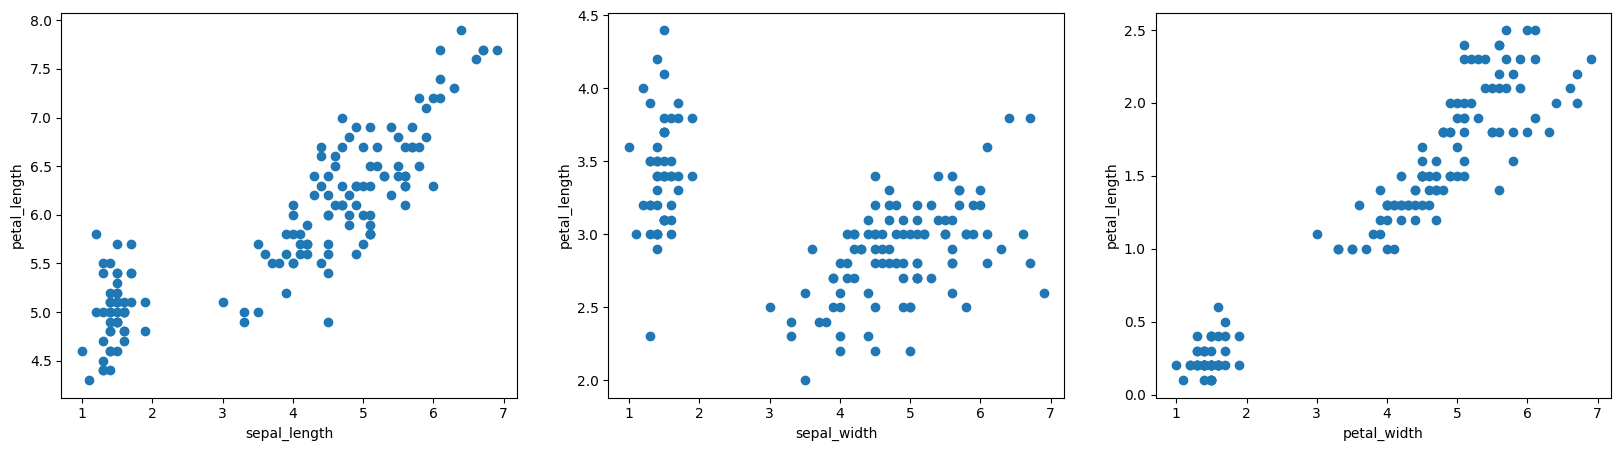

In [83]:
#scatter plot:num vs num
columns = list(num_col)
columns.remove('petal_length')




fig, ax = plt.subplots(1, len(columns), figsize = (20, 5))

for idx, col in enumerate(columns, 0):
    ax[idx].plot(df['petal_length'], df[col], 'o')
    ax[idx].set_xlabel(col)
    ax[idx].set_ylabel('petal_length')

plt.show()

**all  histograms have strong positive relationship, except petal_length with sepal_width is negative weak **

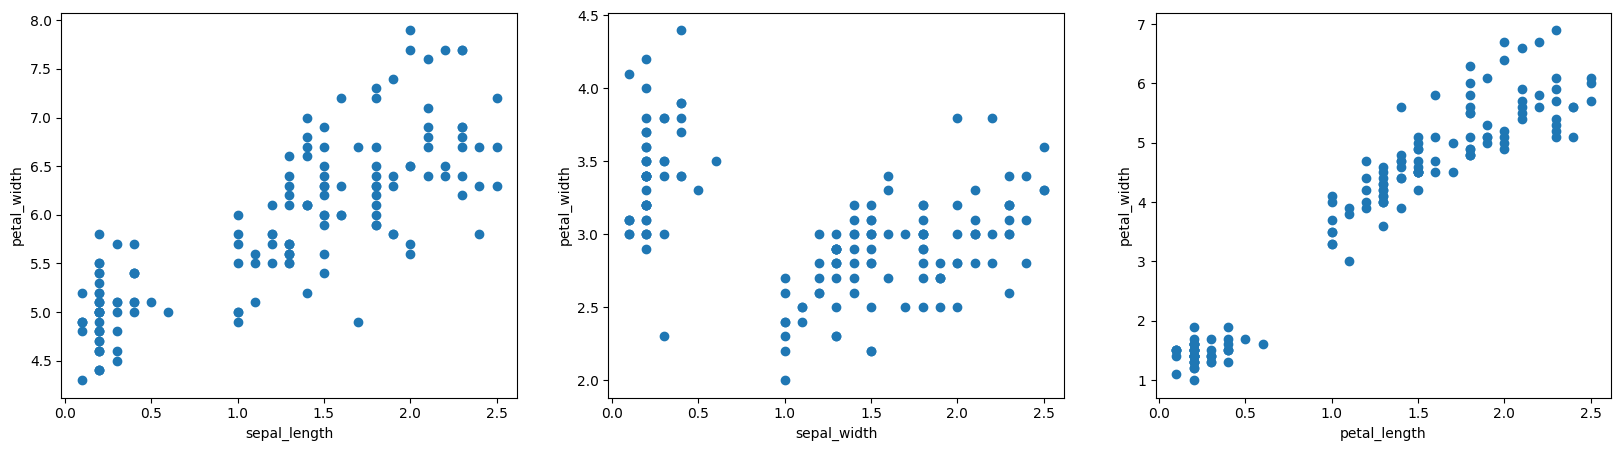

In [84]:
#scatter plot:num vs num
columns = list(num_col)
columns.remove('petal_width')




fig, ax = plt.subplots(1, len(columns), figsize = (20, 5))

for idx, col in enumerate(columns, 0):
    ax[idx].plot(df['petal_width'], df[col], 'o')
    ax[idx].set_xlabel(col)
    ax[idx].set_ylabel('petal_width')

plt.show()

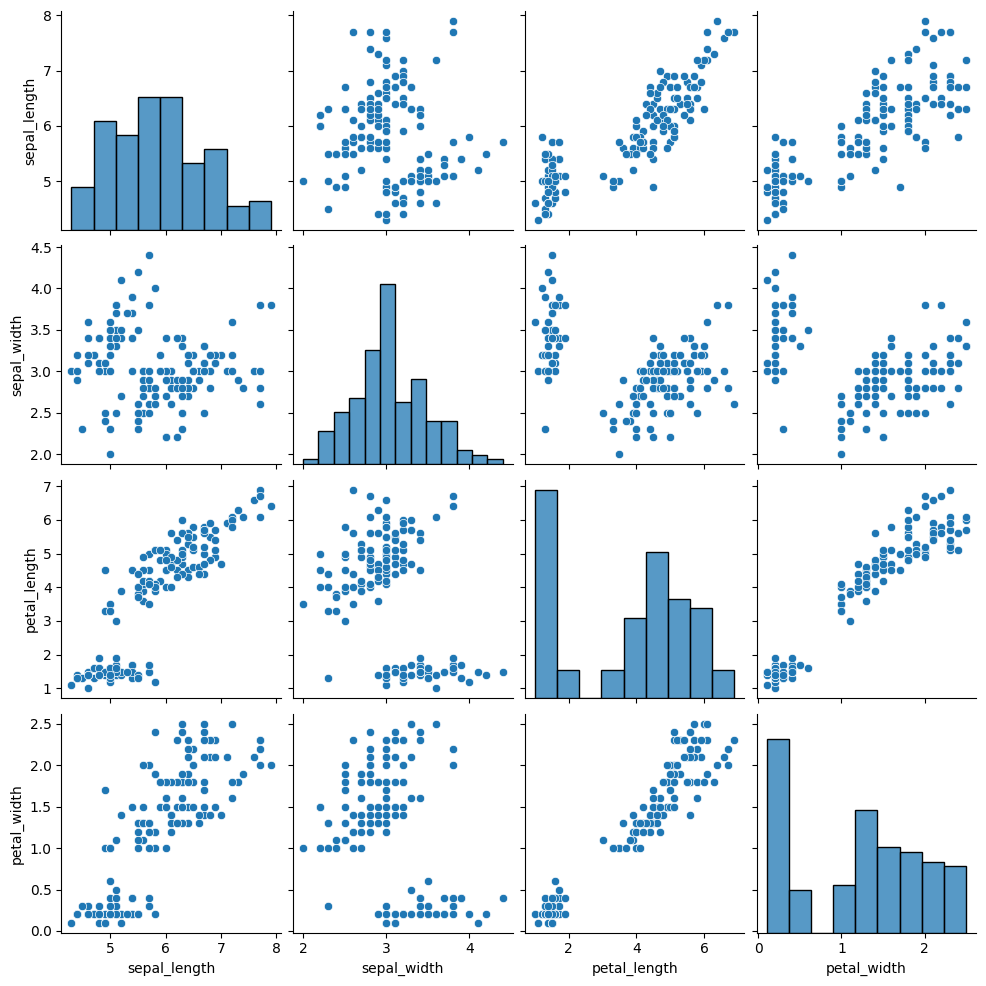

In [51]:
#scatter plot:num vs num
sns.pairplot(df)
plt.show()

comparison between the catagroies of species colm with each num colm
**virginica has the most sepal length,petal length, and width.
setosa has the most sepal width**

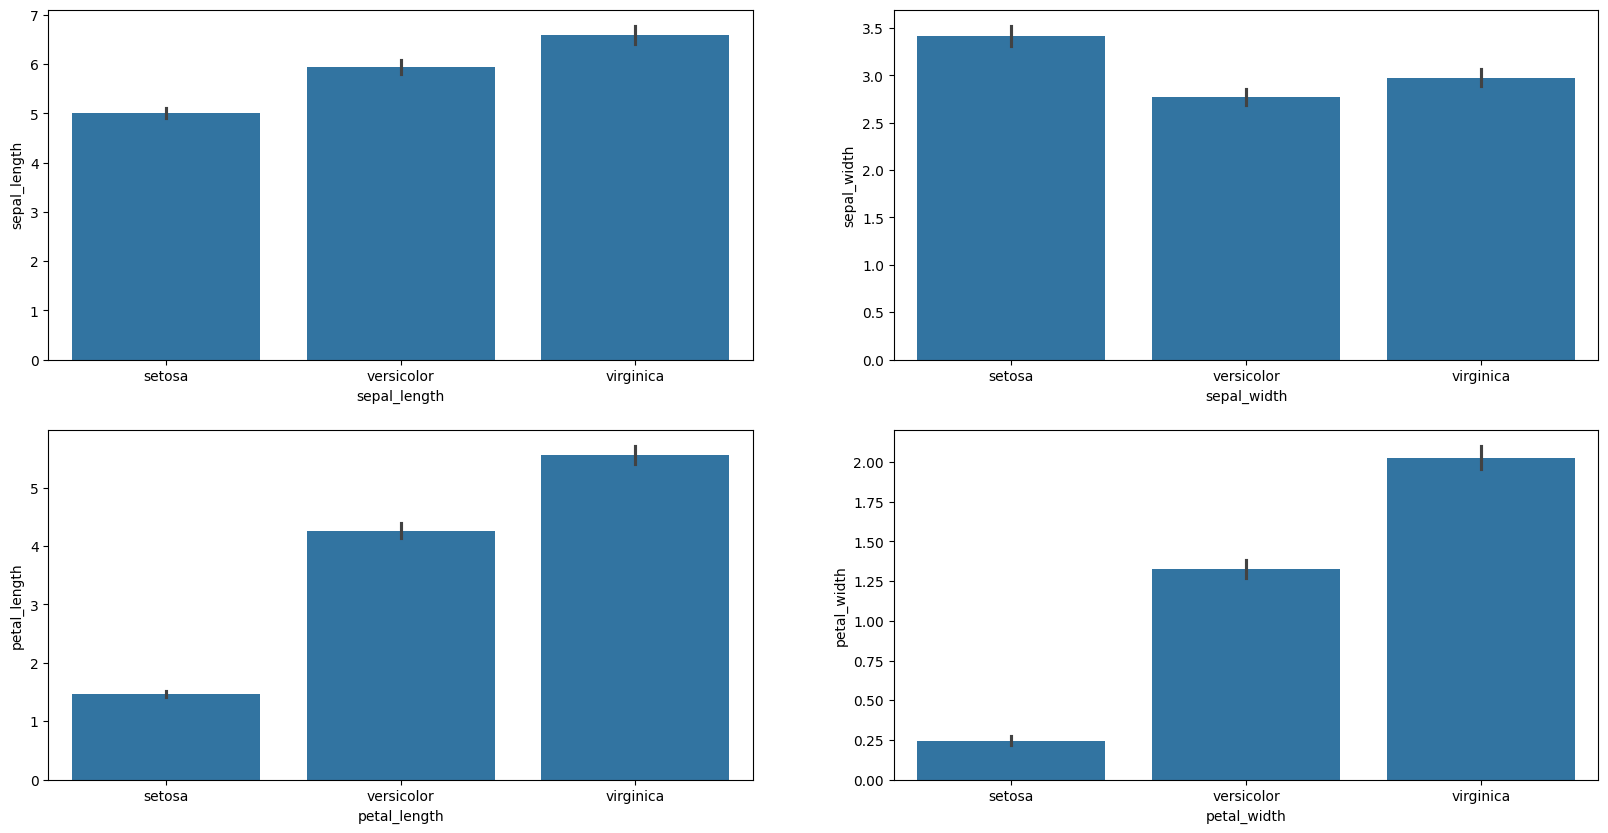

In [103]:
#bar chart:cat vs cat
plt.figure(figsize= (20, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 2, i+ 1)
    sns.barplot(x=df['species'], y=df[col])

    plt.xlabel(f"{col}")
    plt.ylabel(f"{col}")

plt.show()


comparison between the catagroies of species colm with each num colm
** where box plot show the outliers,

1.   virginica  has outliers of its distribution among sepal length and width sepal.
2.   setosa has  outliers of its distribution among petal length and width.
3.    versicolor has outliers of its distribution among petal length**



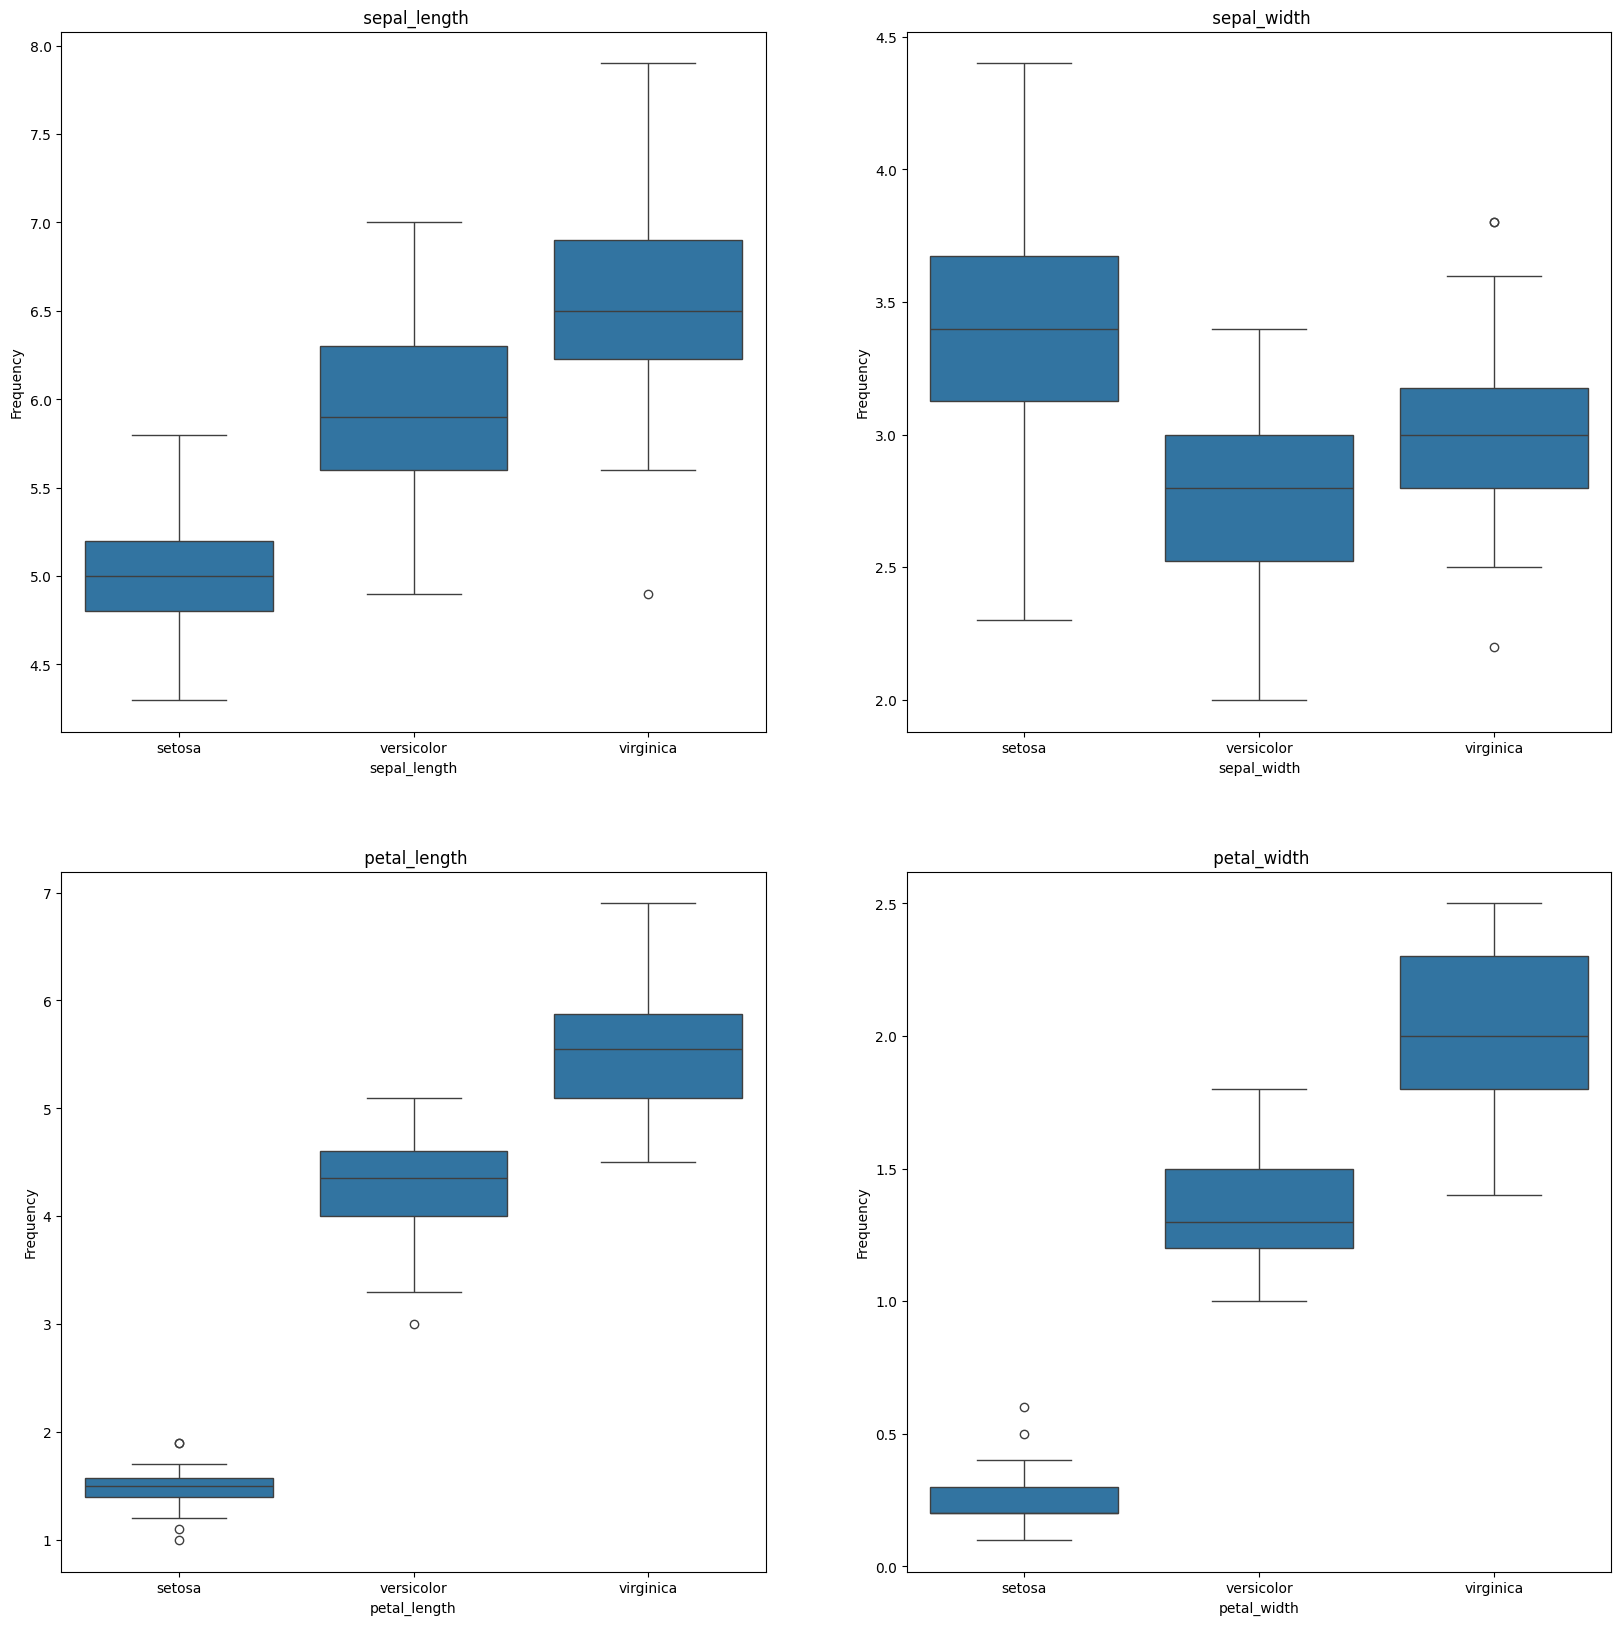

In [97]:
#box plot: cat vs num
plt.figure(figsize= (20, 20))
for i, col in enumerate(num_col):
    plt.subplot(2, 2, i+ 1)
    sns.boxplot(x=df['species'], y=df[col])
    plt.title(f" {col}")
    plt.xlabel(f"{col}")
    plt.ylabel('Frequency')

plt.show()

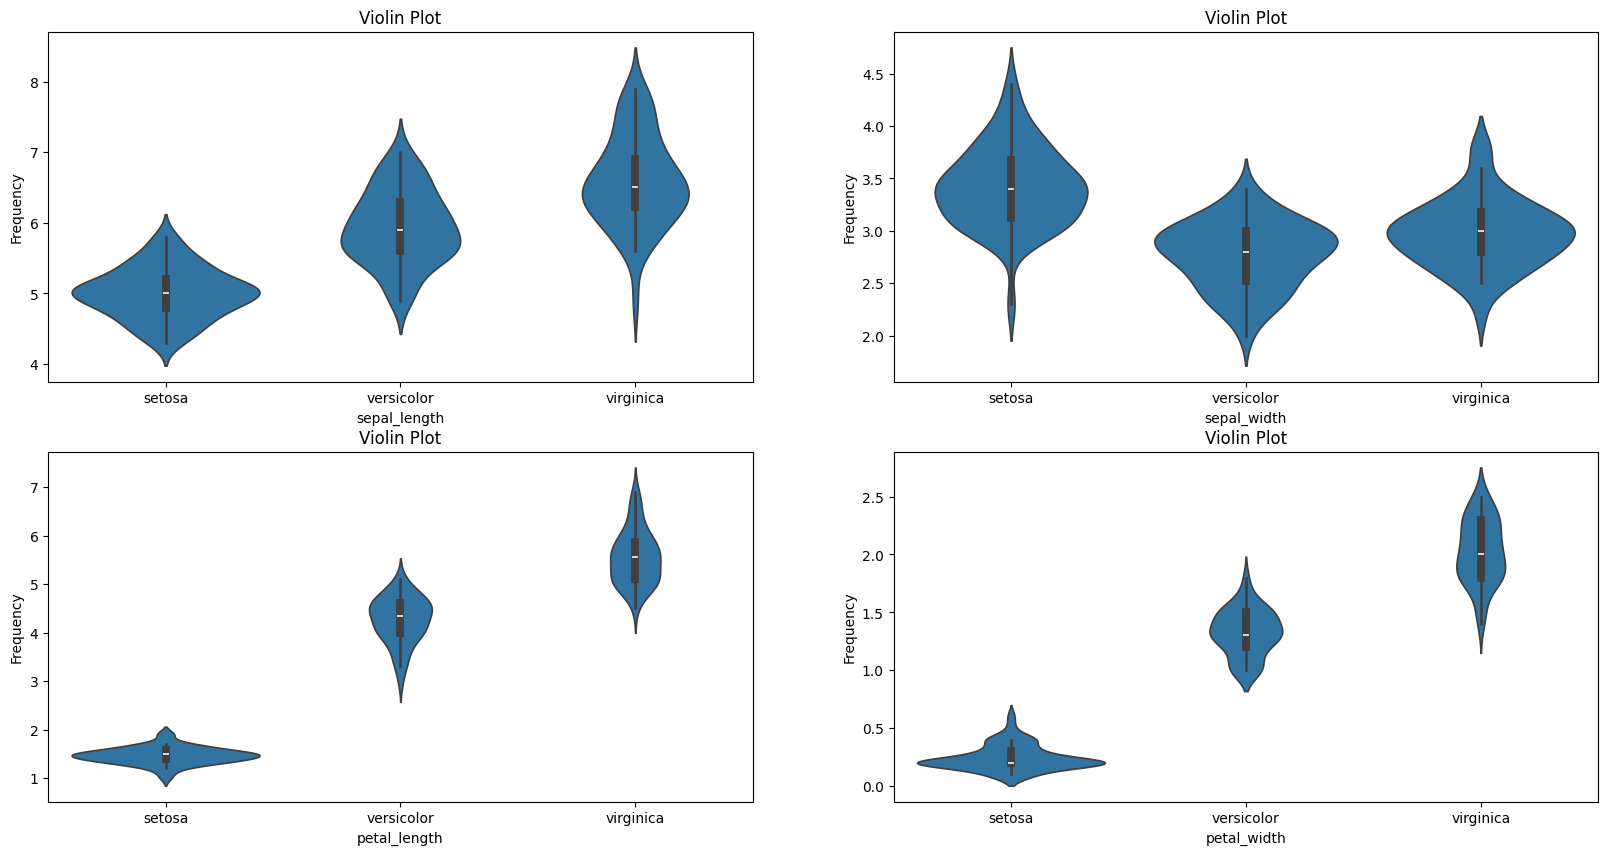

In [95]:
#vio
plt.figure(figsize= (20, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 2, i+ 1)
    sns.violinplot(x=df['species'], y=df[col])
    plt.title('Violin Plot')
    plt.xlabel(f"{col}")
    plt.ylabel('Frequency')
plt.show()

## Multivariate Analysis

heat map used to discover the relationship between all num variables

1.   positive strong relationship between sepal length and petal length and petal width.
2.   positive strong relationship between petal length and petal width.
3.   negative weak relationship between sepal width and petal length
and petal width.

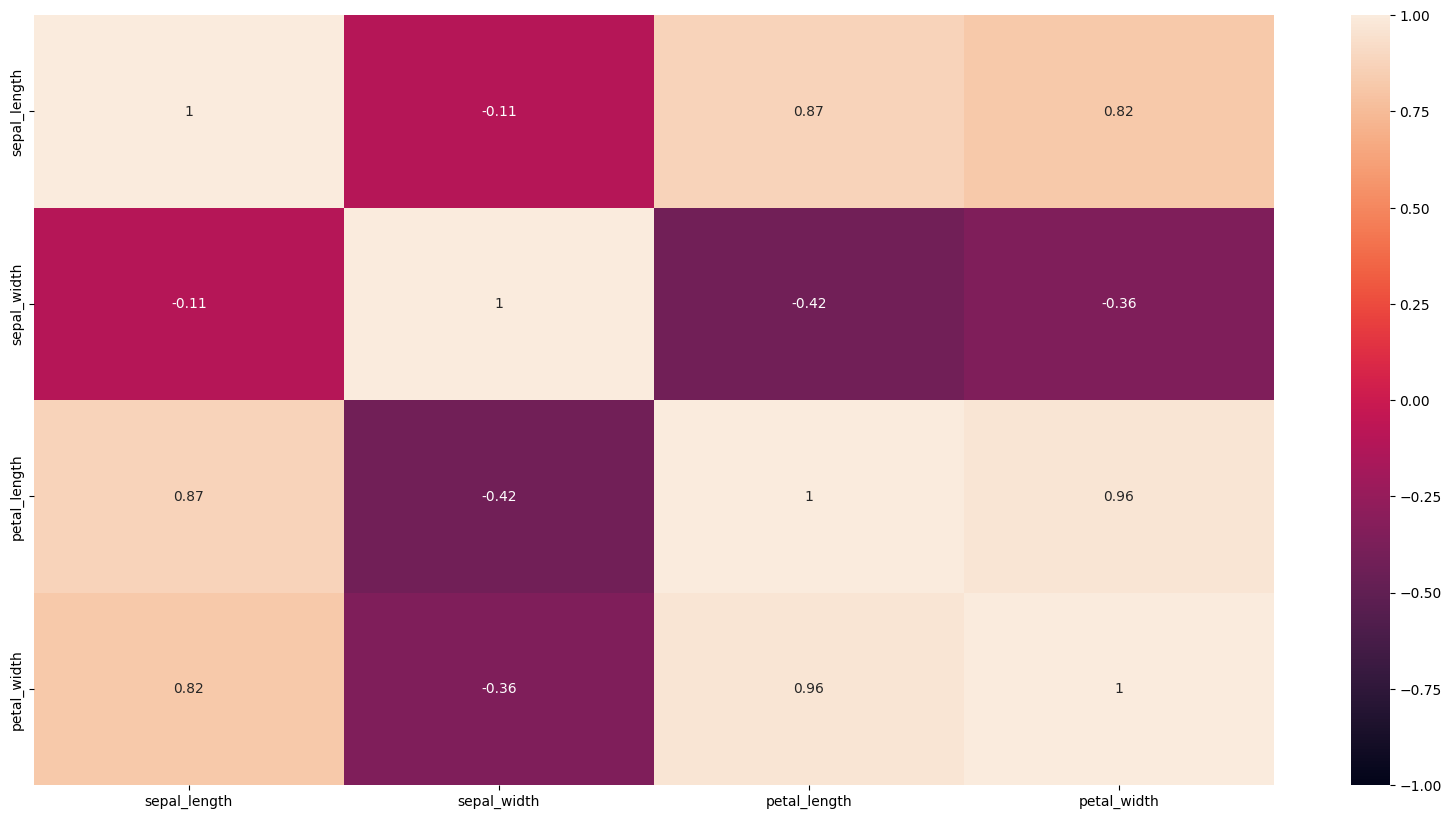

In [50]:
plt.figure(figsize= (20, 10))
sns.heatmap(data= df.drop(["species"], axis= 1).corr(), annot= True,vmin=-1,vmax=1)
plt.show()